In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
import os
from themachinethatgoesping.echosounders.simrad import FileRaw_mapped
from themachinethatgoesping.echosounders import simrad
import themachinethatgoesping.tools.progressbars as prg
import themachinethatgoesping.tools as tools
import themachinethatgoesping.navigation as nav
import numpy
import os, sys
from time import time
from tqdm.auto import tqdm
from collections import defaultdict
import numpy as npHWChannelConfiguration

#load files
folders =  ["/home/data/"]
#folders =  ["/home/data/turbeams/"]

files = []
for folder in folders:
    for r,d,f in os.walk(folder):
        for file in f:
            if file.endswith('.raw'):
                files.append(r + '/' +file)
            
files.sort()
#files
file_name = files[0]

In [2]:
fm = FileRaw_mapped(files[10])
fm

indexing file ⠠ 100% :00s<00m:00s] [Found: 1477 packages]                      


FileSimradRaw
#############
- File path:         ...12-2017/2-overview/D20171214-T115214.raw 
- Total file size: : 24.91 MB                                    

 Detected datagrams 
-------------------- 
- Total:           1477 
- Packages [NME0]: 1008 [NMEA text datagram]
- Packages [XML0]: 157  [XML0 text datagram]
- Packages [MRU0]: 155  [Motion binary datagram]
- Packages [FIL1]: 2    [Filter binary datagram]
- Packages [RAW3]: 155  [Sample binary datagram]

In [3]:
t = []
heave = []
heading = []
akk = tools.vectorinterpolators.AkimaInterpolator()
for m in tqdm(fm("MRU0")):
    t.append(m.timestamp)
    heave.append(m.heave)
    heading.append(m.heading)
    akk.append(m.timestamp,m.heave)

  0%|          | 0/155 [00:00<?, ?it/s]

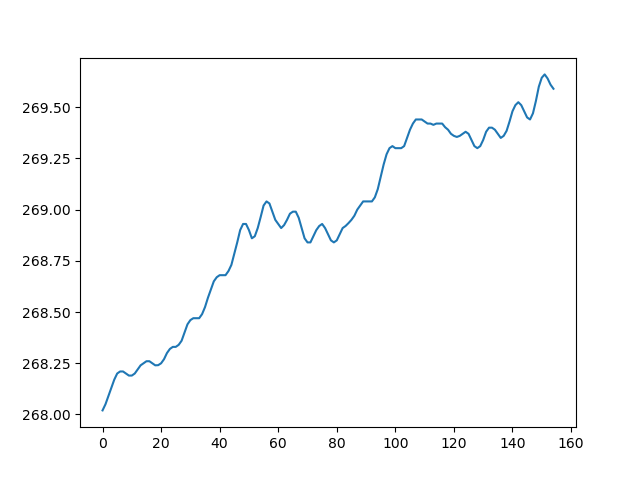

In [4]:
plt.close("mru0")
plt.figure("mru0")
#plt.plot(t,label='time')
#plt.plot(heave,label='heave')
plt.plot(heading,label='heading')